In [3]:
%load_ext autoreload
%autoreload 2
from models import *
import seaborn as sns

sns.set_style("darkgrid")

In [352]:
x_train = np.array([[ 0.37454012],
       [ 0.95071431],
       [ 0.73199394],
       [ 0.59865848],
       [ 0.15601864],
       [ 0.15599452],
       [ 0.05808361],
       [ 0.86617615],
       [ 0.60111501],
       [ 0.70807258],
       [ 0.02058449],
       [ 0.96990985],
       [ 0.83244264],
       [ 0.21233911],
       [ 0.18182497],
       [ 0.18340451],
       [ 0.30424224],
       [ 0.52475643],
       [ 0.43194502],
       [ 0.29122914]])

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None] * 1e-10

y_train = f(x_train)


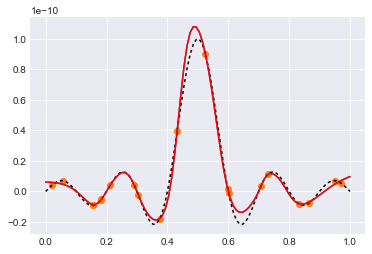

In [353]:
nn = TFModel(dim_basis=50, epochs=1000)
nn.normalize_input = True
nn.normalize_output = True
model = BOModel(nn)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
# x = (np.linspace(-6, 6, 100))[:,None]
# y = np.sinc(x) * 10
model.plot_prediction(x,y)

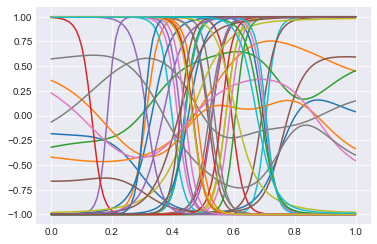

In [300]:
# Plot basis functions

D = model.nn_model.predict_basis(model.sess, x)
for i in range(model.nn_model.dim_basis):
    plt.plot(x, D[:, i])

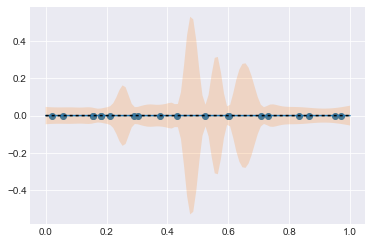

In [276]:
X_line = (np.linspace(0, 1, 100))[:,None]
Y_line = f(x)

reg = BayesianLinearRegression(1.7, 68)
reg.fit(model.D, model.Y, do_optimize=False)
mean, var = reg.predict(model.nn_model.predict_basis(model.sess, X_line))

plt.plot(X_line, mean)
plt.scatter(model.X, model.Y)
plt.plot(X_line, Y_line, dashes=[2, 2], color='black')
plt.fill_between(X_line.reshape(-1), (mean + var * 2).reshape(-1), (mean - var * 2).reshape(-1), alpha=.2)

In [277]:
y_norm, mean_y, std_y = zero_mean_unit_var_normalization(model.Y)

In [278]:
std_y

array([  2.24428426e-05])

In [279]:
reg = BayesianLinearRegression()
reg.fit(model.D, y_norm, do_optimize=True)
mean1, var1 = reg.predict(model.nn_model.predict_basis(model.sess, X_line))

Optimization terminated successfully.
         Current function value: 16.799748
         Iterations: 40
         Function evaluations: 94


In [280]:
mean = zero_mean_unit_var_unnormalization(mean1, mean_y, std_y)
var = var1 * std_y ** 2

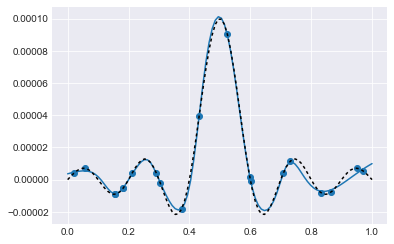

In [281]:
plt.plot(X_line, mean)
plt.scatter(model.X, model.Y)
plt.plot(X_line, Y_line, dashes=[2, 2], color='black')
plt.fill_between(X_line.reshape(-1), (mean + var * 2).reshape(-1), (mean - var * 2).reshape(-1), alpha=.2)

In [326]:
Y_line

array([[  3.89817183e-21],
       [  2.02742469e-06],
       [  3.93349833e-06],
       [  5.52031619e-06],
       [  6.61352254e-06],
       [  7.08060947e-06],
       [  6.84586372e-06],
       [  5.90037347e-06],
       [  4.30592176e-06],
       [  2.19213520e-06],
       [ -2.53122070e-07],
       [ -2.79947296e-06],
       [ -5.19462548e-06],
       [ -7.18808393e-06],
       [ -8.55584459e-06],
       [ -9.12376393e-06],
       [ -8.78731385e-06],
       [ -7.52567821e-06],
       [ -5.40858425e-06],
       [ -2.59486749e-06],
       [  6.77511052e-07],
       [  4.10950160e-06],
       [  7.36580343e-06],
       [  1.01045753e-05],
       [  1.20095630e-05],
       [  1.28218630e-05],
       [  1.23684487e-05],
       [  1.05847527e-05],
       [  7.52900028e-06],
       [  3.38662197e-06],
       [ -1.53613875e-06],
       [ -6.82940279e-06],
       [ -1.20066727e-05],
       [ -1.65398669e-05],
       [ -1.98997981e-05],
       [ -2.15989740e-05],
       [ -2.12332895e-05],
 

Optimization terminated successfully.
         Current function value: 16.514069
         Iterations: 61
         Function evaluations: 132


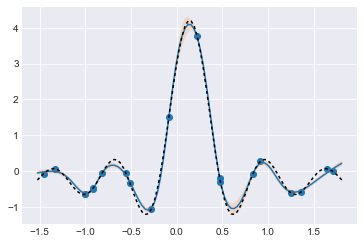

In [343]:
# In normalized space..
X_line = (np.linspace(0, 1, 100))[:,None]
Y_line = f(x)

reg = BayesianLinearRegression()
reg.fit(model.D, y_norm, do_optimize=True)
mean1, var1 = reg.predict(model.nn_model.predict_basis(model.sess, X_line))

X_line_norm, _, _ = zero_mean_unit_var_normalization(X_line, model.nn_model.X_mean, model.nn_model.X_std)
Y_line_norm, _, _ = zero_mean_unit_var_normalization(Y_line, model.nn_model.y_mean, model.nn_model.y_std)
plt.plot(X_line_norm, mean1)
plt.scatter(model.nn_model.X, model.nn_model.y)
plt.plot(X_line_norm, Y_line_norm, dashes=[2, 2], color='black')
plt.fill_between(X_line_norm.reshape(-1), (mean1 + var1 * 2).reshape(-1), (mean1 - var1 * 2).reshape(-1), alpha=.2)

reconstraining parameters GP_regression.linear.variances
reconstraining parameters GP_regression.Gaussian_noise.variance


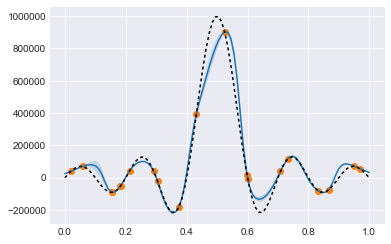

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/models.py:88: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


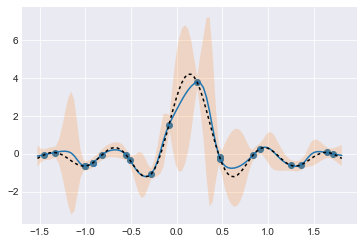

In [82]:
from models import *

rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 20)[:, None]

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None] * 1000000

y_train = f(x_train)

############################################

nn = TFModel(dim_basis=50, epochs=1000, batch_size=10)
model = BOModel(nn)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
# x = (np.linspace(-6, 6, 100))[:,None]
# y = np.sinc(x) * 10
model.plot_prediction(x,y)

############################################
# Plot in normalized space
X_line = (np.linspace(0, 1, 100))[:,None]
Y_line = f(x)

X_line_norm, _, _ = zero_mean_unit_var_normalization(X_line, model.nn_model.X_mean, model.nn_model.X_std)
Y_line_norm, _, _ = zero_mean_unit_var_normalization(Y_line, model.nn_model.y_mean, model.nn_model.y_std)

reg = BayesianLinearRegression()
reg.fit(model.D, model.nn_model.y, do_optimize=True)
mean_norm, var_norm = reg.predict(model.nn_model.predict_basis(model.sess, X_line))

plt.plot(X_line_norm, mean_norm)
plt.scatter(model.nn_model.X, model.nn_model.y)
plt.plot(X_line_norm, Y_line_norm, dashes=[2, 2], color='black')
plt.fill_between(X_line_norm.reshape(-1), (mean_norm + np.sqrt(var_norm)).reshape(-1), (mean_norm - np.sqrt(var_norm)).reshape(-1), alpha=.2)

Optimization terminated successfully.
         Current function value: 256.058692
         Iterations: 53
         Function evaluations: 136


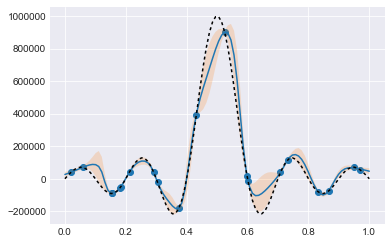

In [81]:
# Plot in input space

reg = BayesianLinearRegression()
reg.fit(model.D, model.nn_model.y, do_optimize=True)
y_mean_norm, y_var_norm = reg.predict(model.nn_model.predict_basis(model.sess, X_line))

y_mean = zero_mean_unit_var_unnormalization(y_mean_norm, model.nn_model.y_mean, model.nn_model.y_std)
y_var = y_var_norm * model.nn_model.y_std ** 2

plt.plot(X_line, y_mean)
plt.scatter(model.X, model.Y)
plt.plot(X_line, Y_line, dashes=[2, 2], color='black')
plt.fill_between(X_line.reshape(-1), (y_mean + np.sqrt(y_var)).reshape(-1), (y_mean - np.sqrt(y_var)).reshape(-1), alpha=.2)


 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


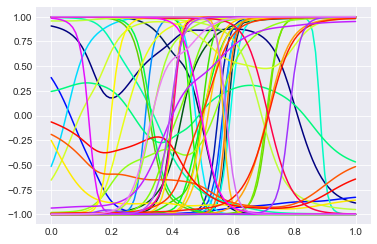

In [57]:
# Plot basis functions

colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, model.nn_model.dim_basis)])

D = model.nn_model.predict_basis(model.sess, x)
for i in range(model.nn_model.dim_basis):
    plt.plot(x, D[:, i])